####  <span style='color:Blue'> Dane do analizy </span>:  Credit_Card.xlsx (na przykładzie Iris.csv)
####  <span style='color:Blue'> Cel badania </span>:  Klasyfikacja kwiatów.
####   <span style='color:Blue'> Klasyfikator </span>:  Decision tree i Random forest. 

##### <span style='color:Blue'>  Zadanie 1 </span>: Ładowanie i wstępna eksploracja
* Liczba rekordów, liczba cech
* Rozkład kategorii. Czy dane są zbalansowane?
##### <span style='color:Blue'>  Zadanie 2 </span>:  Podział zbiór danych na podzbiory w stosunku 0.7:0.3.
##### <span style='color:Blue'>  Zadanie 3 </span>:  Tworzenie klasyfikatora <i>Decision tree</i> i wizualizacja.
##### <span style='color:Blue'>  Zadanie 4 </span>:  Optymalizacja hyperparametrów DT.
* Głębokość drzewa (max_depth = 2,4,)
* Kryterium podziału (criterion = 'gini', 'entropy')
* Miara oceny: roc-auc.
<b>Wniosek</b>: Które parametry są optymalne?
##### <span style='color:Blue'>  Zadanie 5 </span> : Użyć <i>GridSearchCV</i> do wyszukiwania optymalnych hyperparametrów DT.
* Głębokość drzewa (max_depth = 2,4,6,8,10,12)
* Kryterium podziału (criterion = 'gini', 'entropy', 'log_loss')
* Miara oceny: roc-auc.
<b>Wniosek</b>: Które parametry są optymane?

##### <span style='color:Blue'>  Zadanie 6 </span> : Tworzenie klasyfikatora <i> Random forest </i> i wizualizacja.
##### <span style='color:Blue'>  Zadanie 7 </span>: Użyć <i>GridSearchCV</i> do wyszukiwania optymalnych hyperparametrów RF.
##### <span style='color:Blue'>  Zadanie 8 </span>:  Użyć algorytmów do zbalansowania danych:
* OverSampling
* UnderSampling
* SMOTE
* Trenować DT i RF na zbalansowanych zbiorach  i testować modele z zbiorze testowym
##### <span style='color:Blue'>  Zadanie 9 </span>: Napisać podsumowanie:
* Trafność (Accuracy) i miarę F1 klasyfikacji algorytmu DT 
* Trafność (Accuracy) i miarę F1 klasyfikacji algorytmu RF
* Trafność (Accuracy) i miarę F1 klasyfikacji algorytmu DT wykonanego na zbalansowanym zbiorze.
* Trafność (Accuracy) i miarę F1 klasyfikacji algorytmu RF wykonanego na zbalansowanym zbiorze.


In [2]:
#Importowanie danych z lokalnego dysku  
import pandas as pd 
path = 'Datasets/'
df = pd.read_excel(path + 'Credit_card.xlsx')
df.drop('ID', axis=1, inplace=True)
print(df.shape)
df.head(10)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [4]:
# Rozkład kategorii.
class_freq = (df.groupby('default payment next month').size())
print (type(class_freq))
print(class_freq)
#Kategorie nie są zbalansowane

<class 'pandas.core.series.Series'>
default payment next month
0    23364
1     6636
dtype: int64


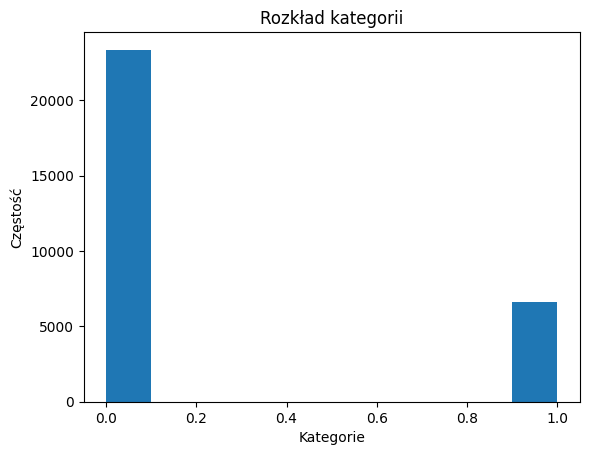

In [5]:
# Rozkładu kategorii, wykres słupkowy  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist( df['default payment next month'] )
plt.xlabel('Kategorie')
plt.ylabel('Częstość')
plt.title('Rozkład kategorii')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train,test = train_test_split (df, test_size=0.3, random_state=50, shuffle = True)

# Tworzyć atrybut docelowy.

X_train = train.iloc[:,:23]
y_train = train.iloc[:,23:] 
X_test = test.iloc[:,:23]
y_test = test.iloc[:,23:] 

print(X_train.shape)
print(X_test.shape)

(21000, 23)
(9000, 23)


In [9]:
# Klasyfikator DT
# Ewaluacja modelu: accuracy-score, 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

tree_clf = DecisionTreeClassifier(max_depth=4, criterion='entropy') 
#wyniki dla max_depth 4 i criterion entropy sa najlepsze
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test,predictions))
#kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#cv_results = cross_val_score(tree_clf, X_train, y_train, cv=kfold, scoring='f1')
#print('Cross validation: mean',  round(cv_results.mean(),2), ', standard deviation: ', round(cv_results.std(),2))

Accuracy: 0.8266666666666667
F1 measure: 0.47721179624664883
ROC AUC score: 0.6603832911887417


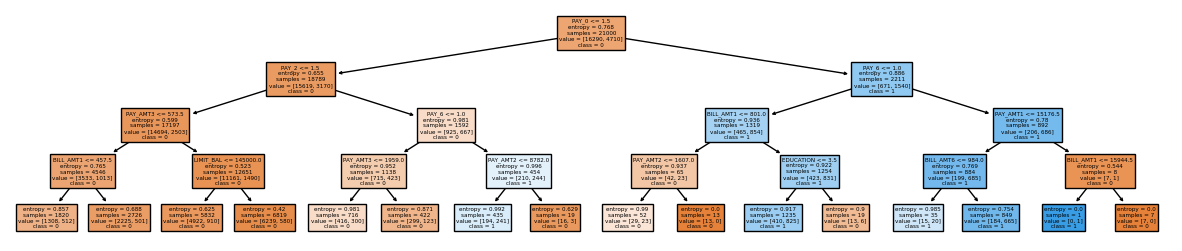

In [31]:
from sklearn import tree 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
t_names = ["0", "1"]
tree.plot_tree(tree_clf, feature_names = f_names, 
                   class_names=t_names, filled = True)
plt.show()

In [32]:
# DT - Text form
from sklearn.tree import export_text
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
r = export_text(tree_clf, feature_names = f_names)
print(r)

|--- PAY_0 <= 1.50
|   |--- PAY_2 <= 1.50
|   |   |--- PAY_AMT3 <= 573.50
|   |   |   |--- BILL_AMT1 <= 457.50
|   |   |   |   |--- class: 0
|   |   |   |--- BILL_AMT1 >  457.50
|   |   |   |   |--- class: 0
|   |   |--- PAY_AMT3 >  573.50
|   |   |   |--- LIMIT_BAL <= 145000.00
|   |   |   |   |--- class: 0
|   |   |   |--- LIMIT_BAL >  145000.00
|   |   |   |   |--- class: 0
|   |--- PAY_2 >  1.50
|   |   |--- PAY_6 <= 1.00
|   |   |   |--- PAY_AMT3 <= 1959.00
|   |   |   |   |--- class: 0
|   |   |   |--- PAY_AMT3 >  1959.00
|   |   |   |   |--- class: 0
|   |   |--- PAY_6 >  1.00
|   |   |   |--- PAY_AMT2 <= 8782.00
|   |   |   |   |--- class: 1
|   |   |   |--- PAY_AMT2 >  8782.00
|   |   |   |   |--- class: 0
|--- PAY_0 >  1.50
|   |--- PAY_6 <= 1.00
|   |   |--- BILL_AMT1 <= 801.00
|   |   |   |--- PAY_AMT2 <= 1607.00
|   |   |   |   |--- class: 0
|   |   |   |--- PAY_AMT2 >  1607.00
|   |   |   |   |--- class: 0
|   |   |--- BILL_AMT1 >  801.00
|   |   |   |--- EDUCATION <= 3.5

In [12]:
# GridSearchCV  
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [2,4,6,8,10,12]
}    

grid = GridSearchCV(
                estimator,
                hyperparam_space,
                cv = 5,
                scoring = 'roc_auc',
                n_jobs = -1)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test,predictions))


best score 0.7559040688998109
best param {'criterion': 'entropy', 'max_depth': 6}
Accuracy: 0.8245555555555556
F1 measure: 0.4748919188560026
ROC AUC score: 0.6594181932521092


In [13]:
# RF classifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

rf = RandomForestClassifier(n_estimators = 10, criterion = 'log_loss', max_depth = 5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
#print(classification_report(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test,predictions))

Accuracy: 0.8255555555555556
F1 measure: 0.4495091164095371
ROC AUC score: 0.6462628712753561


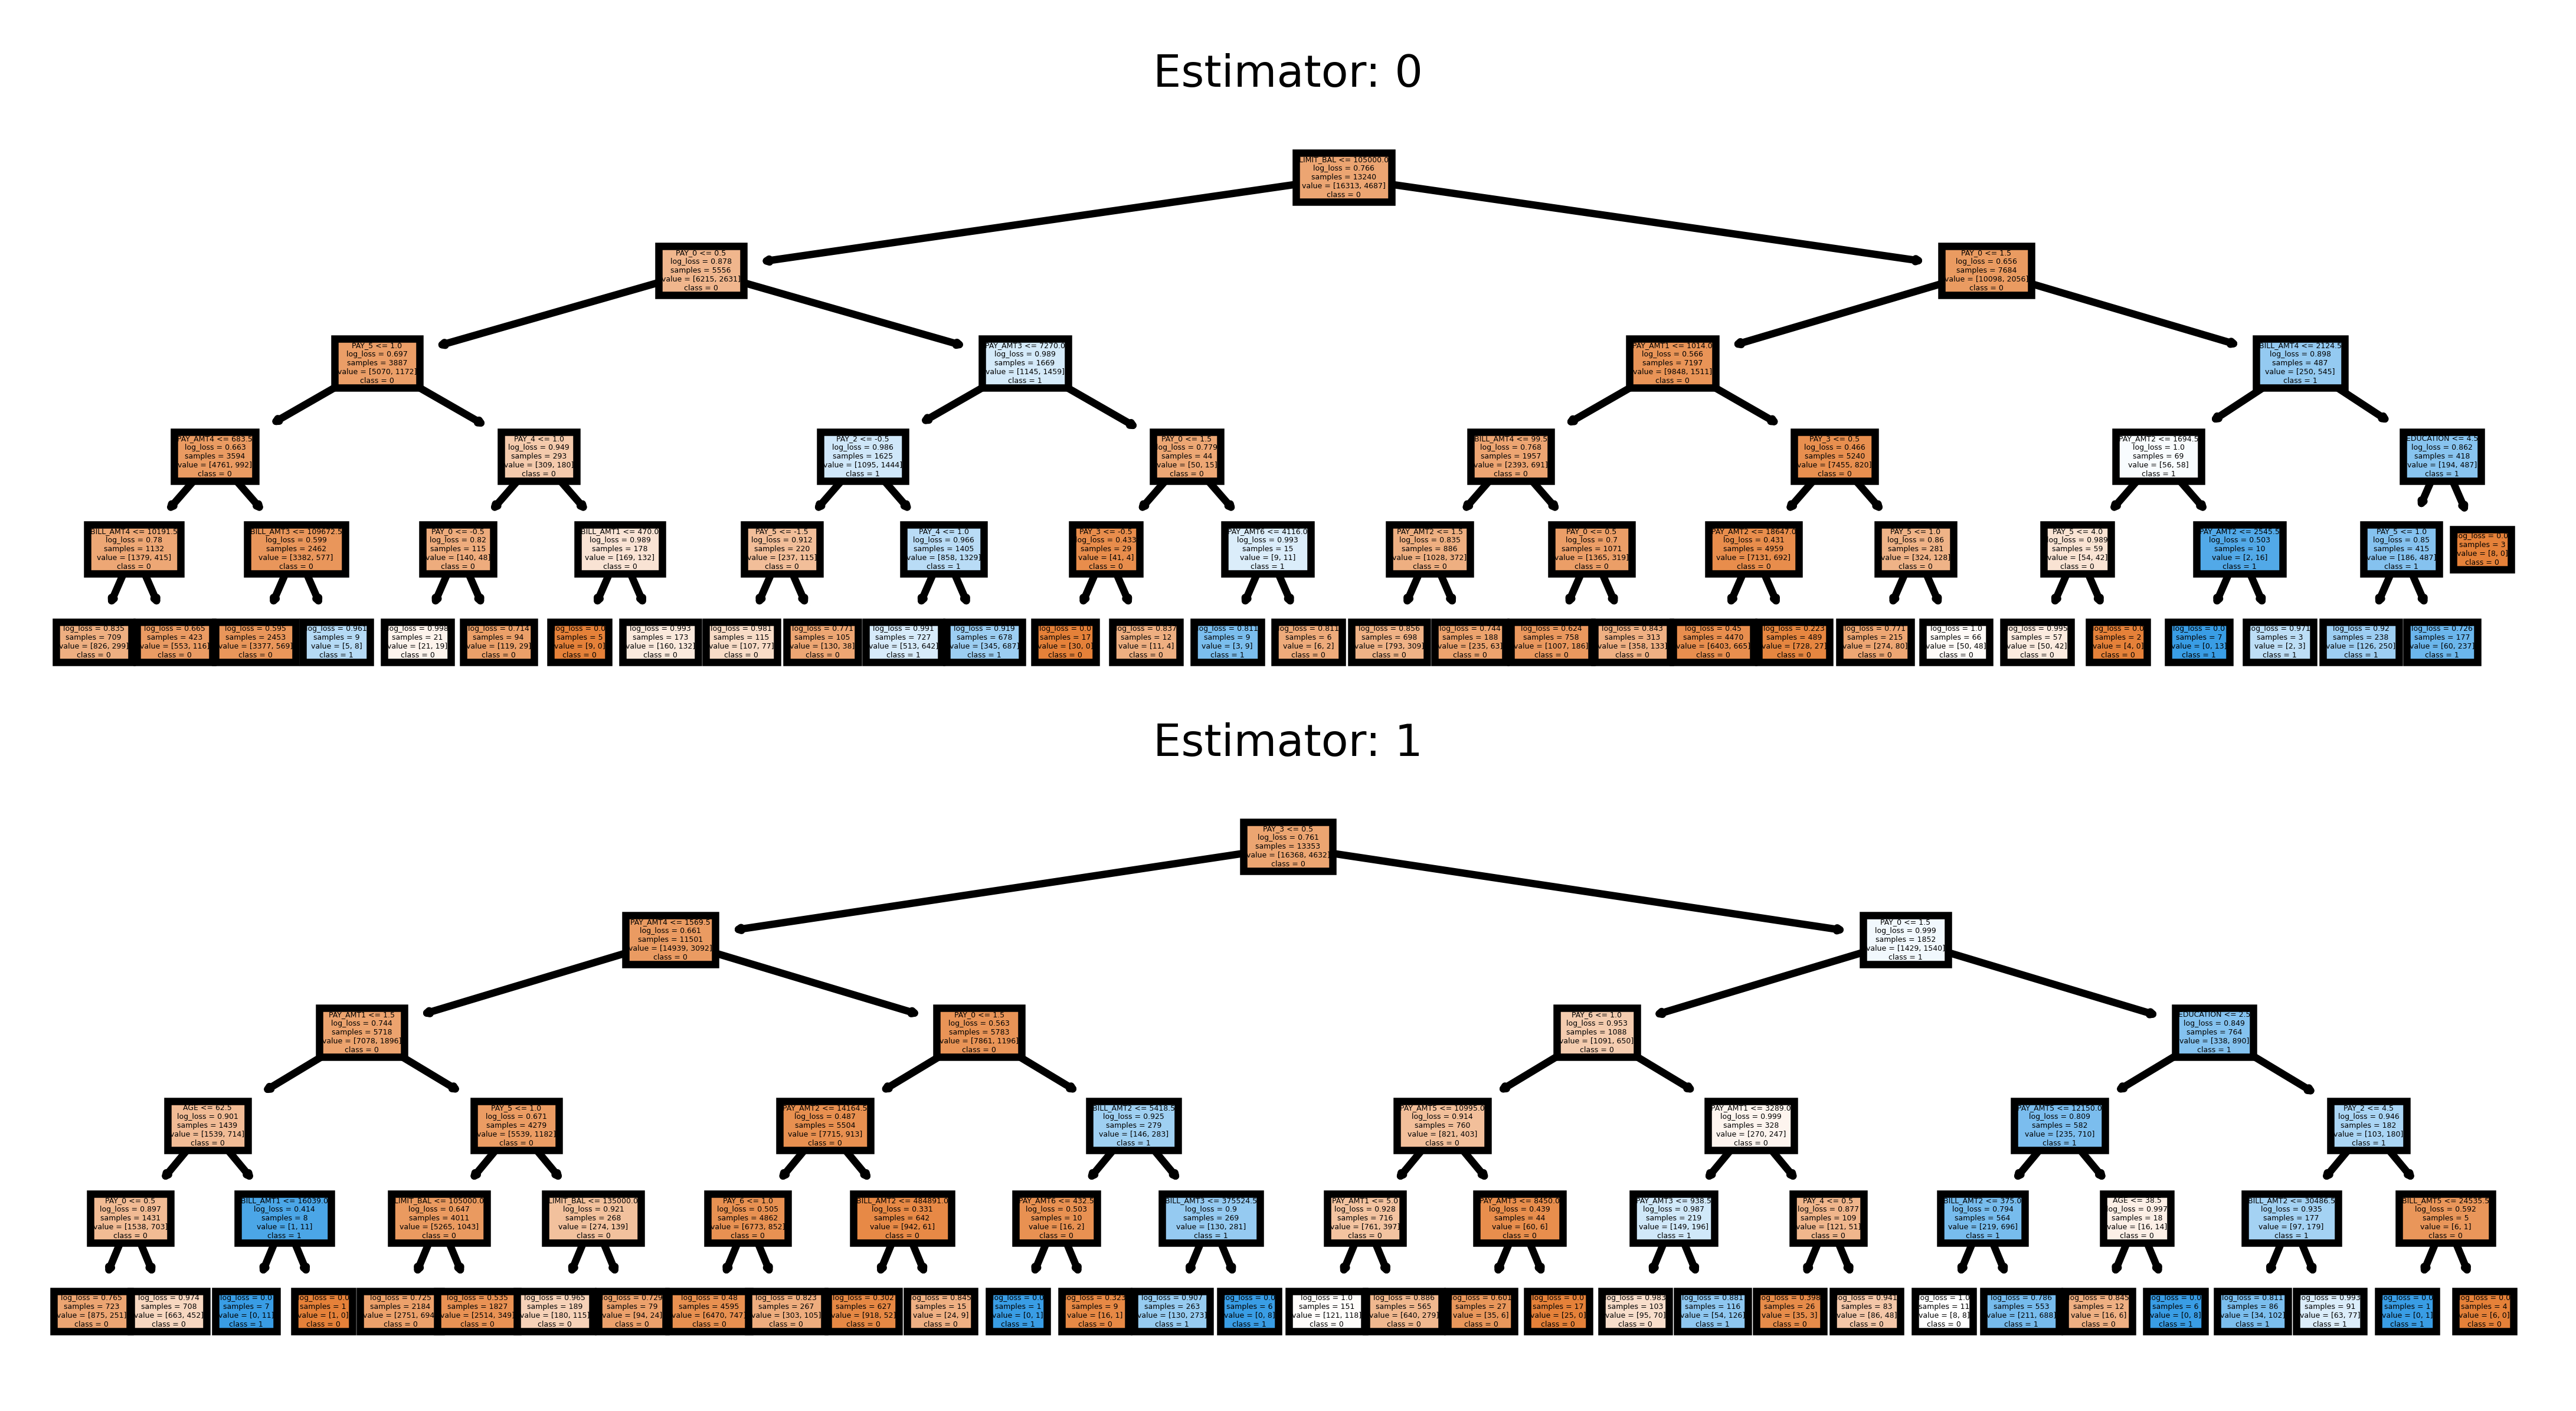

In [28]:
# RF visualization
f_names = list(df.columns.values.tolist())
f_names = f_names[:-1]
t_names = ["0", "1"]
fig, axes = plt.subplots(nrows = 2,ncols = 1,figsize = (6,3), dpi=900)
for index in range(0, 2):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = f_names, 
                   class_names=t_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 6)

In [21]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

estimator = RandomForestClassifier()

hyperparam_space = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [2,4,6,8,10,12],
    'n_estimators' : [2,4,6,8,10,12]
}    

grid = GridSearchCV(
                estimator,
                hyperparam_space,
                cv = 5,
                scoring = 'roc_auc',
                n_jobs = -1)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test,predictions))

best score 0.7750614851047691
best param {'criterion': 'log_loss', 'max_depth': 8, 'n_estimators': 12}
Accuracy: 0.828
F1 measure: 0.4731109598366236
ROC AUC score: 0.6580197590756198


In [22]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
estimator = RandomForestClassifier()

hyperparam_space = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [2,4,6,8,10,12],
    'n_estimators' : [2,4,6,8,10,12]
}    


grid = GridSearchCV(
    estimator,
    hyperparam_space,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
grid.fit(X_resampled, y_resampled)

# Results
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

# Evaluate on the test set
predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score(y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test, predictions))

Best score: 0.8764662966844423
Best parameters: {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 12}
Accuracy: 0.7848888888888889
F1 measure: 0.5284948855333658
ROC AUC score: 0.7042757603861977


In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
estimator = RandomForestClassifier()

hyperparam_space = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [2,4,6,8,10,12],
    'n_estimators' : [2,4,6,8,10,12]
}    


grid = GridSearchCV(
    estimator,
    hyperparam_space,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
grid.fit(X_resampled, y_resampled)

# Results
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

# Evaluate on the test set
predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score(y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test, predictions))

Best score: 0.8634640574968506
Best parameters: {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 12}
Accuracy: 0.7652222222222222
F1 measure: 0.5098585015077708
ROC AUC score: 0.6944100946205535


In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
estimator = RandomForestClassifier()

hyperparam_space = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [2,4,6,8,10,12],
    'n_estimators' : [2,4,6,8,10,12]
}    


grid = GridSearchCV(
    estimator,
    hyperparam_space,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
grid.fit(X_resampled, y_resampled)

# Results
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

# Evaluate on the test set
predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score(y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test, predictions))

Best score: 0.7713526805234379
Best parameters: {'criterion': 'log_loss', 'max_depth': 8, 'n_estimators': 12}
Accuracy: 0.7608888888888888
F1 measure: 0.5364067212408444
ROC AUC score: 0.7192364298378424


In [25]:
estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 4, 6, 8, 10, 12]
}


grid = GridSearchCV(
    estimator,
    hyperparam_space,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
grid.fit(X_resampled, y_resampled)

# Results
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

# Evaluate on the test set
predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score(y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test, predictions))

Best score: 0.8364643239232435
Best parameters: {'criterion': 'gini', 'max_depth': 12}
Accuracy: 0.7238888888888889
F1 measure: 0.47474106954132317
ROC AUC score: 0.6726508023326173


In [26]:
estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 4, 6, 8, 10, 12]
}


grid = GridSearchCV(
    estimator,
    hyperparam_space,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
grid.fit(X_resampled, y_resampled)

# Results
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

# Evaluate on the test set
predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score(y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test, predictions))

Best score: 0.7493002871425931
Best parameters: {'criterion': 'log_loss', 'max_depth': 6}
Accuracy: 0.7747777777777778
F1 measure: 0.5227219213562515
ROC AUC score: 0.7025668566476158


In [27]:
estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 4, 6, 8, 10, 12]
}


grid = GridSearchCV(
    estimator,
    hyperparam_space,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
grid.fit(X_resampled, y_resampled)

# Results
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

# Evaluate on the test set
predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score(y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test, predictions))

Best score: 0.8112945760183837
Best parameters: {'criterion': 'log_loss', 'max_depth': 10}
Accuracy: 0.7161111111111111
F1 measure: 0.47090494926485815
ROC AUC score: 0.6703480429848411
